In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import sys
ROOT_PATH='/content/drive/My Drive/Colab Notebooks/plant_ai/'
sys.path.append(ROOT_PATH)

Mounted at /content/drive/


In [2]:
#ローカルの場合
%cd /Users/user/python_projects/github/plant_ai

/Users/user/python_projects/github/plant_ai


In [ ]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.2
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.2
catalogue==1.0.0
certifi==2021.5.30
cffi==1.14.5
cftime==1.5.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==9.1.0
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.23
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==1.25.3
dlib==1

In [2]:
!pip uninstall -y keras-nightly
!pip uninstall -y tensorflow

Uninstalling keras-nightly-2.5.0.dev2021032900:
  Successfully uninstalled keras-nightly-2.5.0.dev2021032900
Uninstalling tensorflow-2.5.0:
  Successfully uninstalled tensorflow-2.5.0


In [3]:
# !pip install keras==2.1.6
!pip install keras==2.2.5
!pip install tensorflow==1.15
!pip install h5py==2.10.0

     |████████████████████████████████| 337kB 4.1MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 412.3MB 35kB/s 
     |████████████████████████████████| 3.8MB 38.4MB/s 
     |████████████████████████████████| 512kB 43.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=36fc663b8d79e69f6c9742f7fa90274ddcfeb9cf6b450dab2eb4eab684db84a9
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.0 which is incompatible.
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled g

In [ ]:
import numpy as np 
import pickle

with open(ROOT_PATH+'plants/train_data_3.pkl','rb') as f:
    x_train=pickle.load(f)

x_train=x_train.astype('float16')/255.

np.save(ROOT_PATH+'plants/train_data_3_float16',x_train)

In [ ]:
import numpy as np 
import pickle

with open(ROOT_PATH+'plants/test_data_3.pkl','rb') as f:
    x_test=pickle.load(f)

x_test=x_test.astype('float16')/255.

np.save(ROOT_PATH+'plants/test_data_3_float16',x_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,BatchNormalization
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.utils import np_utils
from keras.optimizers import Adam
from keras_preprocessing.image import ImageDataGenerator
import numpy as np 
import pickle


x_train=np.load(ROOT_PATH+'plants/train_data_3_float16.npy')

with open(ROOT_PATH+'plants/train_label_3.pkl','rb') as f:
    t_train=pickle.load(f)

with open(ROOT_PATH+'plants/plant_class_3.pkl','rb') as f:
    classes=pickle.load(f)

num_classes=len(classes)
t_train=np_utils.to_categorical(t_train,num_classes)



model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt=Adam(lr=0.001)

model.compile(
    loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

model.fit(x_train,t_train,batch_size=128,epochs=1)

model.save(ROOT_PATH+'plant_cnn_test.h5')

Using TensorFlow backend.
















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
35500/35500 [==============================] - 91s 3ms/step - loss: 5.0633 - acc: 0.0506


In [ ]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
from keras.utils import np_utils
import pickle


flowers=[dirname for dirname in os.listdir(ROOT_PATH+'plants/train_images/') if not dirname.startswith('.')]

img_idx=0
label_idx=0
train_label=[]

for flower in flowers:
    imgs=[filename for filename in os.listdir(ROOT_PATH+'plants/train_images/'+flower) if not filename.startswith('.')]
    for img_name in imgs:
        img=Image.open(ROOT_PATH+'plants/train_images/'+flower+'/'+img_name)
        img=img.convert('RGB')
        img=img.resize((224,224))
        img.save(ROOT_PATH+'plants/train_data/'+str(img_idx)+'.jpg')
        img_idx+=1
        train_label.append(label_idx)
    label_idx+=1

train_label=np.array(train_label)
train_label=np_utils.to_categorical(train_label,len(flowers))
np.save(ROOT_PATH+'plants/train_label_4',train_label)

with open(ROOT_PATH+'plants/plant_class_4.pkl','wb') as f:
    pickle.dump(flowers,f)


TypeError: ignored

In [ ]:
import numpy as np

train_label=np.load(ROOT_PATH+'plants/train_label_4.npy')
print(train_label)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
import os
import pickle

flowers=[dirname for dirname in os.listdir(ROOT_PATH+'plants/train_images/') if not dirname.startswith('.')]
with open(ROOT_PATH+'plants/plant_class_4.pkl','wb') as f:
    pickle.dump(flowers,f)

flowers

['ナズナ（タラスピ）',
 'モナルダ・ベルガモ',
 'シュウメイギク(秋明菊)',
 '花菖蒲(ハナショウブ)',
 'サイネリア(シネラリア)',
 '朝顔(アサガオ)',
 'リナリア(姫金魚草・ヒメキンギョソウ)',
 'キセワタ',
 'チョコレートコスモス',
 'サフィニア',
 'ミソハギ',
 'アカンサス',
 'ニチニチソウ(日日草・にちにちそう)',
 'サギソウ(鷺草)',
 'キカラスウリ',
 'ストレプトカーパス・サクソルム',
 'ドクダミ',
 'イワタバコ',
 'テマリソウ',
 'レースラベンダー',
 'キンセンカ(金盞花・カレンデュラ)',
 'マルバストラム',
 'ユリオプスデージー',
 'たんぽぽ(蒲公英)',
 'ボックセージ（サルビア・ウルギノーサ）',
 'ギンラン（銀蘭）',
 'フッチンシア',
 'ジャーマンアイリス',
 'ストロベリーキャンドル（クリムゾンクローバー）',
 'スイートピー',
 'グラジオラス',
 'カーネーション',
 'ブプレリウム',
 'スイカズラ（ハニーサックル）',
 'ゲウム・マイタイ',
 'アガスターシェ',
 'オキナワスズメウリ',
 'フウチソウ(風知草)',
 'ハマナス',
 'ニューギニア・インパチェンス',
 'コバノランタナ',
 'ガウラ(ハクチョウソウ)',
 '千日小坊（センニチコボウ）',
 'ユウガオ(夕顔・ゆうがお)',
 'ホトケノザ',
 'ジギタリス',
 'キャットテール(アカリファ)',
 'ブラキカム',
 'ハルジオン',
 'バコパ（ステラ）',
 'アジュガ',
 'ムラサキハナナ(オオアラセイトウ)',
 'アスター',
 'オルレア（オルラヤ）',
 'ロータス・ブリムストーン',
 'マンデビラ',
 'アンゲロニア',
 'ポピー',
 'デルフィニウム',
 'ツワブキ(石蕗)',
 'キランソウ',
 'ツルニチニチソウ',
 'ヒメイワダレソウ(姫岩垂草)',
 'ポインセチア',
 'ミニバラ',
 'マツバギク(松葉菊)',
 'ブライダルベー

In [ ]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
from keras.utils import np_utils
import pickle


with open(ROOT_PATH+'plants/plant_class_4.pkl','rb') as f:
    flowers=pickle.load(f)

img_idx=0
label_idx=0
test_label=[]

for flower in flowers:
    imgs=[filename for filename in os.listdir(ROOT_PATH+'plants/test_images/'+flower) if not filename.startswith('.')]
    for img_name in imgs:
        img=Image.open(ROOT_PATH+'plants/test_images/'+flower+'/'+img_name)
        img=img.convert('RGB')
        img=img.resize((224,224))
        img.save(ROOT_PATH+'plants/test_data/'+str(img_idx)+'.jpg')
        img_idx+=1
        test_label.append(label_idx)
    label_idx+=1

test_label=np.array(test_label)
test_label=np_utils.to_categorical(test_label,len(flowers))
np.save(ROOT_PATH+'plants/test_label_4',train_label)

In [ ]:
import os
import pickle
from natsort import natsorted

img_names=natsorted(os.listdir(ROOT_PATH+'plants/train_data/'))

with open(ROOT_PATH+'plants/img_names.pkl','wb') as f:
    pickle.dump(img_names,f)

In [4]:
train_img_dir=ROOT_PATH+'plants/train_images'
test_img_dir=ROOT_PATH+'plants/test_images'

In [ ]:
#ローカルの場合
train_img_dir='./train_images'
test_img_dir='./test_images'

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,BatchNormalization
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.utils import np_utils,Sequence
from keras.optimizers import Adam
from keras_preprocessing.image import ImageDataGenerator
import numpy as np 
# from skimage.io import imread
import pickle
import os
import multiprocessing

process_count = multiprocessing.cpu_count() - 1
batch_size=128
lr=0.001

with open(ROOT_PATH+'plants/plant_class_4.pkl','rb') as f:
    classes=pickle.load(f)

num_classes=len(classes)

# class plantAiSequence(Sequence):

#     def __init__(self, x_set, t_set, batch_size):
#         self.x, self.t = x_set, t_set
#         self.batch_size = batch_size

#     def __len__(self):
#         return int(np.ceil(len(self.x) / float(self.batch_size)))

#     def __getitem__(self, idx):
#         batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
#         batch_y = self.t[idx * self.batch_size:(idx + 1) * self.batch_size]

#         return np.array([imread(file_name).astype("float16") for file_name in batch_x])/255, batch_y

#     def on_epoch_end(self):
#         # epoch終了時の処理
#         pass
               
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=[0.5,1],
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_img_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        subset='training')

_label = train_generator.class_indices
print(_label)

test_datagen=ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        test_img_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        subset='validation')

model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt=Adam(lr=lr)

model.compile(
    loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

# with open(ROOT_PATH+'plants/img_names.pkl','rb') as f:
#     img_names=pickle.load(f)

# file_pass_list=np.array([ROOT_PATH+'plants/train_data/'+filename for filename in img_names])
# train_label=np.load(ROOT_PATH+'plants/train_label_4.npy')

# np.random.seed(0)
# shuffle_idx=np.random.permutation(len(train_label))
# file_pass_list=file_pass_list[shuffle_idx]
# train_label=train_label[shuffle_idx]

os.makedirs(ROOT_PATH+'models', exist_ok=True)
model_checkpoint = ModelCheckpoint(
    filepath=os.path.join(ROOT_PATH+'models', 'model_{epoch:02d}_{val_loss:.2f}.h5'),
    monitor='val_loss',
    verbose=1)

model.fit_generator(
        train_generator,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=1,
        verbose=2,
        workers=process_count,
        callbacks=[model_checkpoint])

# model.fit_generator(plantAiSequence(file_pass_list,
#                                     train_label,128),
#                     epochs=100,
#                     use_multiprocessing=True, workers=process_count
#                     )

model.save(ROOT_PATH+'plant_cnn_4.h5')

Using TensorFlow backend.


Found 35501 images belonging to 325 classes.
{'Cyclamen Creator Yasuhiro Takahashi(CCYT)': 0, 'たんぽぽ(蒲公英)': 1, 'ぺラルゴニウム': 2, 'ほおずき（鬼灯）': 3, 'アイスランドポピー': 4, 'アイビーゼラニウム': 5, 'アイリス': 6, 'アガスターシェ': 7, 'アカンサス': 8, 'アキノタムラソウ（秋の田村草）': 9, 'アグロステンマ': 10, 'アゲラタム(カッコウアザミ)': 11, 'アザレア': 12, 'アサギリソウ': 13, 'アジュガ': 14, 'アスター': 15, 'アスチルベ': 16, 'アストランティア': 17, 'アネモネ・シルベストリス': 18, 'アネモネ・バージニアナ': 19, 'アマランサス': 20, 'アメリカヅタ': 21, 'アメリカンブルー(エボルブルス)': 22, 'アヤメ(文目・あやめ）': 23, 'アリッサム（スイートアリッサム）': 24, 'アルケミラモリス': 25, 'アルストロメリア': 26, 'アルテルナンテラ・レッドフラッシュ(アカバセンニチコウ)': 27, 'アルメリア(ハマカンザシ)': 28, 'アロンソア': 29, 'アンゲロニア': 30, 'イカリソウ(錨草)': 31, 'イベリス': 32, 'イレシネ': 33, 'イワタバコ': 34, 'イングリッシュデージー': 35, 'インパチェンス': 36, 'ウラシマソウ': 37, 'エキナセア': 38, 'エキベキア・エレクトラショック': 39, 'エラチオールベゴニア(リーガースベゴニア)': 40, 'エリゲロン': 41, 'オオイヌノフグリ': 42, 'オオバキスミレ': 43, 'オキナグサ(翁草)': 44, 'オキナワスズメウリ': 45, 'オジギソウ(おじぎそう・おじぎ草)': 46, 'オシロイバナ(おしろい花)': 47, 'オステオスペルマム': 48, 'オダマキ(苧環)': 49, 'オリエンタルポピー': 50, 'オルレア

NameError: ignored

In [ ]:
from keras.models import load_model
from keras.utils import np_utils
import numpy as np
import pickle


x_test=np.load(ROOT_PATH+'plants/test_data_4.npy')
t_test=np.load(ROOT_PATH+'plants/test_label_4.npy')

model=load_model(ROOT_PATH+'plant_cnn_4.h5')
scores=model.evaluate(x_test,t_test,verbose=1)
print('Test loss: ',scores[0])
print('Test accuracy: ',scores[1])

9036/9036 [==============================] - 18s 2ms/step
Test loss:  2.01331547621659
Test accuracy:  0.5650730411422733


predict: リナリア(姫金魚草・ヒメキンギョソウ):0.86,ぺラルゴニウム:0.09,Cyclamen Creator Yasuhiro Takahashi(CCYT):0.04
correct: リナリア(姫金魚草・ヒメキンギョソウ)


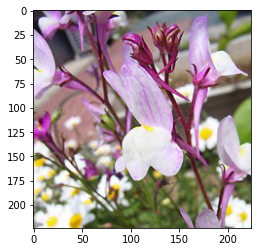

In [ ]:
from keras.models import load_model
import numpy as np 
import pickle
import matplotlib.pyplot as plt


# with open(ROOT_PATH+'plants/train_data_3.pkl','rb') as f:
#     x_train=pickle.load(f)

# with open(ROOT_PATH+'plants/train_label_3.pkl','rb') as f:
#     t_train=pickle.load(f)

with open(ROOT_PATH+'plants/test_data_3.pkl','rb') as f:
    x=pickle.load(f)

with open(ROOT_PATH+'plants/test_label_3.pkl','rb') as f:
    t=pickle.load(f)

with open(ROOT_PATH+'plants/plant_class_3.pkl','rb') as f:
    classes=pickle.load(f)

model=load_model(ROOT_PATH+'plant_cnn_3.h5')
x=x.astype('f')/255
index=47
img=x[index]
plt.imshow(img)
x=np.array([img])
y=model.predict(x,batch_size=1)
sort_y=sorted(y[0])[::-1]
z=np.argsort(y[0])[::-1]
print('predict: {}:{:.2f},{}:{:.2f},{}:{:.2f}'.format(classes[z[0]],sort_y[0],classes[z[1]],sort_y[1],classes[z[2]],sort_y[2]))
print('correct: '+classes[t[index]])

In [ ]:
!pip install coremltools==4.0

     |████████████████████████████████| 3.4MB 14.5MB/s 
  Created wheel for attr: filename=attr-0.3.1-cp37-none-any.whl size=2458 sha256=cb0a4c3c157b7c59192304bb692521b9c8c9df715fff9f7ab42eab62270d9f9f
  Stored in directory: /root/.cache/pip/wheels/f0/96/9b/1f8892a707d17095b5a6eab0275da9d39e68e03a26aee2e726
Successfully built attr


In [ ]:
import coremltools
import pickle

with open(ROOT_PATH+'plants/plant_class_3.pkl','rb') as f:
    classes=pickle.load(f)

coreml_model=coremltools.converters.keras.convert(
    ROOT_PATH+'plant_cnn_test.h5',input_names='image',image_input_names='image',
    output_names='Prediction',class_labels=classes,image_scale=1/255.0)

coreml_model.save(ROOT_PATH+'plant_cnn_test.mlmodel')

0 : conv2d_1_input, <keras.engine.input_layer.InputLayer object at 0x7f7f79fd5d50>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x7f7f79fd5b50>
2 : batch_normalization_1, <keras.layers.normalization.BatchNormalization object at 0x7f7f79fdafd0>
3 : activation_1, <keras.layers.core.Activation object at 0x7f7f7a1fc610>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x7f7f7a2061d0>
5 : batch_normalization_2, <keras.layers.normalization.BatchNormalization object at 0x7f8410110f50>
6 : activation_2, <keras.layers.core.Activation object at 0x7f7f79f99a50>
7 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x7f7f79f50d50>
8 : conv2d_3, <keras.layers.convolutional.Conv2D object at 0x7f7f79f5a950>
9 : batch_normalization_3, <keras.layers.normalization.BatchNormalization object at 0x7f7f79f684d0>
10 : activation_3, <keras.layers.core.Activation object at 0x7f7f79f61190>
11 : conv2d_4, <keras.layers.convolutional.Conv2D object at 0x7f7f79f27450>
12 : batch_